# Linear Regression

**Definition:** Linear regression is a statistical method for modelling relationship between a dependent variable with a given set of independent variables. For example, we are given some data points of x and corresponding y and we need to learn the relationship between them that is called a **hypothesis**.

In case of linear regression, the hypothesis is a straight line: $h(x)=\omega x + b$

Where $\omega$ is a vector called **weigths** and $b$ is a scalar called **bias**.

All we need to do is estimate the value of $\omega$ and $b$ from the given set of data such that the resultant hypothesis produces the least cost $J$ which is defined by the following cost function

$J(\omega, b)=\frac{1} {2m}\sum_{i=1}^m(y_i-h(x_i))^2$

where $m$ is the number of data points in the given dataset. This cost function is also called **Mean Squared Error**.

For finding the optimized value of the parameters for which $J$ is minimum, we will be using a commonly used optimizer algorithm called **Gradient Descent**. Following is the pseudo-code for Gradient Descent:

Repeat untill Convergence 

    w = w - α * δJ/δw
    b = b - α * δJ/δb

Where $\alpha$ is a **hyperparameter** called the **Learning Rate**.


# Implementation


In [4]:
%tensorflow_version 1.x

In [8]:
# Importing necessary libraries. Numpy for Tensor computation
# and matplotlib for plotting
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
# In order to make random numbers more predictable
# we define fixed seeds for both Numpy and Tensorflow
np.random.seed(101)
tf.set_random_seed(101)

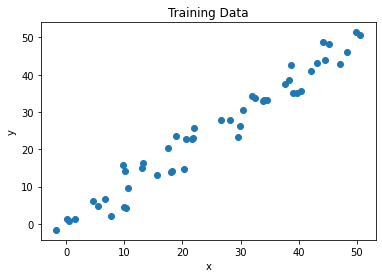

In [10]:
# Generate random linear data
x = np.linspace(0, 50, num=50)
y = np.linspace(0, 50, num=50)

# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

m = len(x) # Number of data points

# Plotting the randomized data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 50 : cost = 5.2335815 W = 1.0273161 b = -0.33595607
Epoch 100 : cost = 5.2369714 W = 1.0268768 b = -0.3144783
Epoch 150 : cost = 5.2401304 W = 1.0264845 b = -0.29529518
Epoch 200 : cost = 5.243056 W = 1.0261341 b = -0.2781603
Epoch 250 : cost = 5.2457495 W = 1.0258211 b = -0.26285723
Epoch 300 : cost = 5.248219 W = 1.0255415 b = -0.24918869
Epoch 350 : cost = 5.2504797 W = 1.0252919 b = -0.23697995
Epoch 400 : cost = 5.25254 W = 1.0250689 b = -0.2260754
Epoch 450 : cost = 5.254414 W = 1.0248697 b = -0.21633582
Epoch 500 : cost = 5.256113 W = 1.0246918 b = -0.20763645
Epoch 550 : cost = 5.257653 W = 1.0245329 b = -0.19986646
Epoch 600 : cost = 5.2590446 W = 1.0243909 b = -0.1929263
Epoch 650 : cost = 5.2602997 W = 1.0242641 b = -0.18672726
Epoch 700 : cost = 5.2614355 W = 1.024151 b = -0.18119058
Epoch 750 : cost = 5.2624536 W = 1.0240498 b = -0.17624527
Epoch 800 : cost = 5.2633743 W = 1

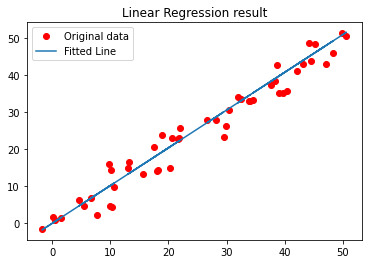

In [12]:
# Defining placeholders, so that we can 
# feed our training examples into the optimizer
# during the training process
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Declaring the trainable variables
# for the weights and bias
W = tf.Variable(np.random.randn(), name="W")
b = tf.Variable(np.random.randn(), name="b")

# Learning rate, and number of epochs
learning_rate = 0.01
training_epochs = 1000

# Now, we will be building the Hypothesis, 
# the Cost Function, and the Optimizer.
# Gradient Descent is already built-in in TensorFlow
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * m)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(training_epochs):

    for (_x, _y) in zip(x,y):
      sess.run(optimizer, feed_dict={X: _x, Y: _y})

    if (epoch + 1) % 50 == 0:
      c = sess.run(cost, feed_dict={X: x, Y: y})
      print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))

    training_cost = sess.run(cost, feed_dict={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

# Plotting results
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predictions, label='Fitted Line')
plt.title('Linear Regression result')
plt.legend()
plt.show()